In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('data/1983.csv')

In [ ]:
df[df['day']==1]

In [ ]:
TEST_RECORDS = {
    0:'1-0 (8-7)',
    1:'(12-3)',
    2:'0-9 (4-11)',
    3:'12-2 (13-2)',
    4:'3-12 (3-12)',
    5:'- (-)',
    6:'3-2',
    7:'10-1-2',
    8:'3-1 (3-1-12)',
    9:'2-10-1 (2-10-3)',
}

In [ ]:
def absence_detect(record):
    if not record.find('-') == record.rfind('-'):
        return True
    return False

In [ ]:
def test_absence():
    assert(absence_detect(TEST_RECORDS[7]) == True)
    assert(absence_detect(TEST_RECORDS[6]) == False)
test_absence()

In [ ]:
def get_start_index(record):
    parentheses_index = record.find('(')
    if parentheses_index == 0:
        return 1
    return 0

In [ ]:
def get_first_index(record):
    return record.find('-')

In [ ]:
def get_last_index(record):
    return record.rfind('-')

In [ ]:
def get_end_index(record):
    open_par_index = record.find('(')
    if open_par_index and open_par_index != -1:
        return open_par_index - 1
    close_par_index = record.find(')') #Only happens if opening parenthesis at index 0
    if close_par_index and close_par_index != -1:
        return close_par_index
    return len(record)

In [ ]:
def test_indexes():
    assert(get_start_index(TEST_RECORDS[0]) == 0)
    assert(get_start_index(TEST_RECORDS[1]) == 1)
    assert(get_first_index(TEST_RECORDS[6]) == get_last_index(TEST_RECORDS[6]) == 1)
    assert(get_first_index(TEST_RECORDS[7]) == 2)
    assert(get_last_index(TEST_RECORDS[7]) == 4)
    assert(get_end_index(TEST_RECORDS[0]) == 3)
    assert(get_end_index(TEST_RECORDS[1]) == 5)
    assert(get_end_index(TEST_RECORDS[6]) == 3)
    assert(get_end_index(TEST_RECORDS[7]) == 6)
    assert(get_end_index(TEST_RECORDS[8]) == 3)
    assert(get_end_index(TEST_RECORDS[9]) == 6)
test_indexes()

In [ ]:
def get_post_fight(record):
    start = get_start_index(record)
    end = get_end_index(record)
    post_fight = record[start:end]
    return post_fight

In [ ]:
def test_post_fight():
    assert(get_post_fight(TEST_RECORDS[0]) == '1-0')
    assert(get_post_fight(TEST_RECORDS[1]) == '12-3')
    assert(get_post_fight(TEST_RECORDS[2]) == '0-9')
    assert(get_post_fight(TEST_RECORDS[3]) == '12-2')
    assert(get_post_fight(TEST_RECORDS[4]) == '3-12')
    assert(get_post_fight(TEST_RECORDS[6]) == '3-2')
    assert(get_post_fight(TEST_RECORDS[7]) == '10-1-2')
    assert(get_post_fight(TEST_RECORDS[8]) == '3-1')
    assert(get_post_fight(TEST_RECORDS[9]) == '2-10-1')
test_post_fight()

In [ ]:
import functools

def nan_exception(func):                                                                         
    """ Decorator to return np.nan when exception is raised | func --> func """                                                                                               
    @functools.wraps(func)                                                                            
    def wrapper(*args, **kwargs):                                                                     
        try:                                                                                      
            wrapped_func = func(*args, **kwargs)                                                  
        except Exception as e:                                                                    
            wrapped_func = np.nan                                                                                                                          
        return wrapped_func                                                                           
    return wrapper

In [ ]:
@nan_exception
def get_post_wins(record):
    record = get_post_fight(record)
    end_index = get_first_index(record)
    return int(record[:end_index])

In [ ]:
def test_post_wins():
    assert(get_post_wins(TEST_RECORDS[0]) == 1)
    assert(get_post_wins(TEST_RECORDS[1]) == 12)
    assert(get_post_wins(TEST_RECORDS[2]) == 0)
    assert(get_post_wins(TEST_RECORDS[3]) == 12)
    assert(get_post_wins(TEST_RECORDS[4]) == 3)
    assert(np.isnan(get_post_wins(TEST_RECORDS[5])))
    assert(get_post_wins(TEST_RECORDS[6]) == 3)
    assert(get_post_wins(TEST_RECORDS[7]) == 10)
test_post_wins()

In [ ]:
@nan_exception
def get_post_losses(record):
    record = get_post_fight(record)
    if absence_detect(record):
        start_index = get_first_index(record) + 1
        end_index = get_last_index(record)
        return int(record[start_index:end_index])
    start_index = get_first_index(record) + 1
    return int(record[start_index:])

In [ ]:
def test_post_losses():
    assert(get_post_losses(TEST_RECORDS[0]) == 0)
    assert(get_post_losses(TEST_RECORDS[1]) == 3)
    assert(get_post_losses(TEST_RECORDS[2]) == 9)
    assert(get_post_losses(TEST_RECORDS[3]) == 2)
    assert(get_post_losses(TEST_RECORDS[4]) == 12)
    assert(np.isnan(get_post_losses(TEST_RECORDS[5])))
    assert(get_post_losses(TEST_RECORDS[6]) == 2)
    assert(get_post_losses(TEST_RECORDS[7]) == 1)
test_post_losses()

In [ ]:
@nan_exception
def get_post_absences(record):
    record = get_post_fight(record)
    if absence_detect(record):
        start_index = get_last_index(record) + 1
        return int(record[start_index:])
    return 0

In [ ]:
def test_post_absences():
    assert(get_post_absences(TEST_RECORDS[6]) == 0)
    assert(get_post_absences(TEST_RECORDS[7]) == 2)
    assert(get_post_absences(get_post_fight(TEST_RECORDS[8])) == 1)
    assert(get_post_absences(get_post_fight(TEST_RECORDS[9])) == 1)

In [ ]:
df

In [138]:
def convert_match(match, record=False):
    ref = match.copy()
    ref['rikishi1_id'] = match['rikishi2_id']
    ref['rikishi2_id'] = match['rikishi1_id']
    ref['rikishi1_win'] = match['rikishi2_win']
    ref['rikishi2_win'] = match['rikishi1_win']
    ref['rikishi1_result'] = match['rikishi2_result']
    ref['rikishi2_result'] = match['rikishi1_result']
    ref['rikishi1_shikona'] = match['rikishi2_shikona']
    ref['rikishi2_shikona'] = match['rikishi1_shikona']
    ref['rikishi1_rank'] = match['rikishi2_rank']
    ref['rikishi2_rank'] = match['rikishi1_rank']
    if record:
        ref['post1_wins'] = match['post2_wins']
        ref['post2_wins'] = match['post1_wins']
        ref['pre1_wins'] = match['pre2_wins']
        ref['pre2_wins'] = match['pre1_wins']
        ref['post1_losses'] = match['post2_losses']
        ref['post2_losses'] = match['post1_losses']
        ref['pre1_losses'] = match['pre2_losses']
        ref['pre2_losses'] = match['pre1_losses']
        ref['post1_absences'] = match['post2_absences']
    return ref

In [ ]:
def same_match(match1, match2):
    ref = convert_match(match2)
    bool_series = match1 == ref
    return bool_series.all()

In [ ]:
df = pd.read_csv('data/1983.csv')
df2 = df.shift(fill_value=0)
df2

In [ ]:
df3 = df2.apply(convert_match, axis=1)
compare_previous = (df == df3).all(axis=1)
compare_previous
df.loc[:,'compare_previous'] = compare_previous
df

In [ ]:
unique = df.loc[~df.compare_previous, :'rikishi2_win']
unique

In [ ]:
unique.loc[:,'post1_wins'] = unique.loc[:,'rikishi1_result'].apply(get_post_wins)
unique.loc[:,'post1_losses'] = unique.loc[:,'rikishi1_result'].apply(get_post_losses)

In [ ]:
unique.loc[:,'post2_wins'] = unique.loc[:,'rikishi2_result'].apply(get_post_wins)
unique.loc[:,'post2_losses'] = unique.loc[:,'rikishi2_result'].apply(get_post_losses)

In [ ]:
unique.loc[unique.isnull()['post1_losses'],:]

In [ ]:
unique.loc[unique.isnull().any(axis=1),unique.isnull().any(axis=0)]

In [ ]:
unique.loc[unique.isnull().any(axis=1),:]

In [ ]:
unique.loc[:,'post2_absences'] = unique.loc[:,'rikishi2_result'].apply(get_post_absences)
unique.loc[:,'post1_absences'] = unique.loc[:,'rikishi1_result'].apply(get_post_absences)

In [ ]:
unique.loc[unique.isnull().any(axis=1),unique.isnull().any(axis=0)]

In [ ]:
unique.loc[unique.isnull().any(axis=1),:]

In [57]:
unique

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,...,post1_wins,post1_losses,post2_wins,post2_losses,post2_absences,post1_absences,pre1_wins,pre2_wins,pre1_losses,pre2_losses
0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),False,yorikiri,4306,Ms1e,...,0,1,1,0,0,0,0,0,0,0
2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),True,oshidashi,4323,J13e,...,1,0,0,1,0,0,0,0,0,0
4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),False,yorikiri,4319,J11w,...,0,1,1,0,0,0,0,0,0,0
6,1983.01,1,4109,J10w,Kotogatake,0-1 (7-8),False,tsukidashi,4129,J11e,...,0,1,1,0,0,0,0,0,0,0
8,1983.01,1,4111,J10e,Zaonishiki,0-1 (4-11),False,hatakikomi,4130,J9w,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,1983.11,15,1363,O2eHD,Hokutenyu,11-4,True,yorikiri,4112,O1w,...,11,4,11,4,0,0,10,11,4,3
5480,1983.11,15,4080,Y2eHD,Kitanoumi,11-4,False,yorikiri,4127,O1e,...,11,4,11,4,0,0,11,10,3,4
5482,1983.11,15,1354,Y1w,Chiyonofuji,14-1,True,yorikiri,4104,Y1e,...,14,1,13,2,0,0,13,13,1,1
5484,1983.11,16,1348,J4w,Jingaku,(11-4),False,sotogake,1378,J1w,...,11,4,11,4,0,0,11,11,4,4


In [ ]:
unique.loc[:,'pre1_wins'] = unique.loc[:,'post1_wins'] - unique.loc[:,'rikishi1_win']
unique.loc[:,'pre2_wins'] = unique.loc[:,'post2_wins'] - unique.loc[:,'rikishi2_win']
unique.loc[:,'pre1_losses'] = unique.loc[:,'post1_losses'] - unique.loc[:,'rikishi2_win']
unique.loc[:,'pre2_losses'] = unique.loc[:,'post2_losses'] - unique.loc[:,'rikishi1_win']
unique.loc[unique.day == 16, 'pre1_wins'] = unique.loc[unique.day == 16, 'post1_wins'] #Playoff adjustment - playoff wins don't count in records
unique.loc[unique.day == 16, 'pre2_wins'] = unique.loc[unique.day == 16, 'post2_wins']
unique.loc[unique.day == 16, 'pre1_losses'] = unique.loc[unique.day == 16, 'post1_losses']
unique.loc[unique.day == 16, 'pre2_losses'] = unique.loc[unique.day == 16, 'post2_losses']
unique.loc[unique.day == 16, :]

In [ ]:
short = unique[['rikishi1_result', 'rikishi2_result', 'rikishi1_win', 'rikishi2_win', 'pre1_wins', 'pre1_losses', 'post1_wins', 'post1_losses', 'pre2_wins', 'pre2_losses', 'post2_wins', 'post2_losses']]

In [ ]:
short

In [ ]:
short1 = short[['pre1_wins', 'pre1_losses', 'rikishi1_win']]

In [ ]:
short2 = short[['pre2_wins', 'pre2_losses', 'rikishi2_win']]

In [ ]:
combine1 = short1.rename(columns={'pre1_wins':'wins','pre1_losses':'losses','rikishi1_win':'victory'})
combine2 = short2.rename(columns={'pre2_wins':'wins','pre2_losses':'losses','rikishi2_win':'victory'})

In [ ]:
combine = combine1.append(combine2)

In [ ]:
rikishi_wl = combine.reset_index()

In [ ]:
rikishi_wl

In [ ]:
rikishi_wl['victory'].mean()

In [ ]:
test = rikishi_wl.groupby(['wins','losses'])

In [ ]:
print_all(test['victory'].mean())

In [ ]:
records = test['victory'].size()

In [56]:
records

wins  losses
0     0         368
      1         184
      2          96
      3          50
      4          32
               ... 
12    2           5
13    0           3
      1           7
14    0           3
      1           2
Name: victory, Length: 120, dtype: int64

In [ ]:
def print_all(dataframe):
    pd.set_option('display.max_rows', None)
    print(dataframe)
    pd.set_option('display.max_rows', 30)

In [ ]:
print_all(records)

In [58]:
matchups = unique.loc[:,['pre1_wins','pre2_wins','pre1_losses','pre2_losses','rikishi1_win']]

In [67]:
matchups.groupby(['pre1_wins', 'pre1_losses', 'pre2_wins', 'pre2_losses']).size() 

2.0

In [69]:
test = matchups.groupby(['pre1_wins', 'pre1_losses', 'pre2_wins', 'pre2_losses']).size() 

In [70]:
test

pre1_wins  pre1_losses  pre2_wins  pre2_losses
0          0            0          0              184
           1            0          1               42
                        1          0               52
           2            0          2               15
                        1          1               15
                                                 ... 
13         1            10         4                1
                        13         1                2
14         0            11         3                1
                        14         0                1
           1            14         1                1
Length: 689, dtype: int64

In [71]:
type(test)

pandas.core.series.Series

In [90]:
chiyonofuji_1 = unique.loc[unique['rikishi1_shikona'] == 'Chiyonofuji', :]

In [91]:
chiyonofuji_2 = unique.loc[unique['rikishi2_shikona'] == 'Chiyonofuji', :]

In [154]:
chiyonofuji = chiyonofuji_1.append(chiyonofuji_2)

In [155]:
chiyonofuji.sort_values(by=['basho','day'], inplace=True)

In [156]:
chiyonofuji.loc[chiyonofuji['rikishi2_shikona'] == 'Chiyonofuji', :] = chiyonofuji.loc[chiyonofuji['rikishi2_shikona'] == 'Chiyonofuji', :].apply(convert_match, axis=1, record=True)

In [157]:
chiyonofuji_01 = chiyonofuji.loc[unique['basho'] == 1983.01, :]

In [158]:
chiyonofuji_01

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,...,post1_wins,post1_losses,post2_wins,post2_losses,post2_absences,post1_absences,pre1_wins,pre2_wins,pre1_losses,pre2_losses
62,1983.01,1,1354,Y1e,Chiyonofuji,1-0 (12-3),True,yorikiri,4134,K1w,...,1,0,0,1,0,0,0,0,0,0
124,1983.01,2,1354,Y1e,Chiyonofuji,2-0 (12-3),True,tsuridashi,4107,M4e,...,2,0,0,2,0,0,1,0,0,1
190,1983.01,3,1354,Y1e,Chiyonofuji,3-0 (12-3),True,uwatenage,1369,M3e,...,3,0,2,1,0,0,2,2,0,0
250,1983.01,4,1354,Y1e,Chiyonofuji,4-0 (12-3),True,yorikiri,4126,M2w,...,4,0,1,3,0,0,3,1,0,2
314,1983.01,5,1354,Y1e,Chiyonofuji,5-0 (12-3),True,yorikiri,4099,M2e,...,5,0,2,3,0,0,4,2,0,2
374,1983.01,6,1354,Y1e,Chiyonofuji,6-0 (12-3),True,shitatenage,4116,K1e,...,6,0,2,4,0,0,5,2,0,3
436,1983.01,7,1354,Y1e,Chiyonofuji,7-0 (12-3),True,shitatenage,4102,M4w,...,7,0,2,5,0,0,6,2,0,4
494,1983.01,8,1354,Y1e,Chiyonofuji,8-0 (12-3),True,yoritaoshi,1374,M1w,...,8,0,3,5,0,0,7,3,0,4
558,1983.01,9,1354,Y1e,Chiyonofuji,9-0 (12-3),True,yoritaoshi,4078,M1e,...,9,0,2,7,0,0,8,2,0,6
618,1983.01,10,1354,Y1e,Chiyonofuji,10-0 (12-3),True,yorikiri,1338,M7e,...,10,0,6,4,0,0,9,6,0,3


<AxesSubplot:xlabel='day'>

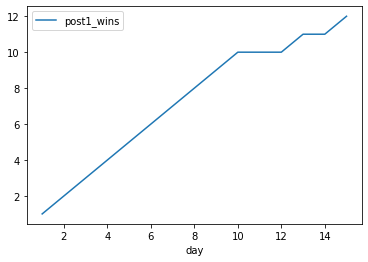

In [159]:
chiyonofuji_01.plot(y='post1_wins', x='day', kind='line')